https://zephyrus1111.tistory.com/224
Gradient Boosting
https://white-joy.tistory.com/10
성능평가지표

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

import pickle
import joblib

In [2]:
def corr_plot(model, cond_cols):
    plt.plot(cond_cols, model.feature_importances_)
    return plt.show()

def pred_plot(model, X_test, y_test, prop_cols, name="default"):
    x = np.arange(1,len(X_test)+1)
    plt.figure(figsize=(15,10))
    plt.plot(x, model.predict(X_test), label="predict")
    plt.plot(x, y_test, label="original")
    plt.ylabel(prop_cols[0])
    plt.title(name)
    plt.legend()
    return plt.show()

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

def spearman(y_true, y_pred):
    return stats.spearmanr(y_true, y_pred)

def summarize(model, cond_cols, prop_cols, x, y, X_test, y_test):
#     corr_plot(model, cond_cols)
    print("Paras : ", model.get_params())
    pred_plot(model, x, y, prop_cols, name="train")
    r2_train = model.score(x, y)
    r2_test = model.score(X_test, y_test)
    print("train ","rmse:",rmse(y, model.predict(x))," mape:", mape(y, model.predict(x)), " r2:", r2_train)
    print(spearman(y, model.predict(x)))
    pred_plot(model, X_test, y_test, prop_cols, name="test")
    print("test ","rmse:", rmse(y_test, model.predict(X_test)), " mape:", mape(y_test, model.predict(X_test)), " r2:", r2_test)
    print(spearman(y_test, model.predict(X_test)))

In [3]:
df = pd.read_csv('../data_220926.csv', index_col=0)
df

,materials,equipments,sample_num,layer_num,laser_power(w),scan_speed(mm/sec),density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%),lamination_direction,trial_no,laser_density
0,sus,Vulcan 500,433.0,274,240.0,1540.0,7.64,449.14,633.20,25.0,0.0,1.0,0.155844
1,sus,Vulcan 500,434.0,274,264.0,1540.0,7.74,450.59,635.25,28.8,0.0,1.0,0.171429
2,sus,Vulcan 500,435.0,274,312.0,1540.0,7.72,448.42,632.19,38.5,0.0,1.0,0.202597
3,sus,Vulcan 500,436.0,274,360.0,1540.0,7.80,453.55,639.41,38.5,0.0,1.0,0.233766
4,sus,Vulcan 500,437.0,274,240.0,1320.0,7.74,473.84,629.69,36.9,0.0,1.0,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,sus,Vulcan 500,2193.0,2549,264.0,1100.0,7.88,481.31,596.89,35.9,90.0,1.0,0.240000
236,sus,Vulcan 500,2193.0,2549,312.0,1100.0,7.90,469.26,576.68,39.0,90.0,1.0,0.283636
237,sus,Vulcan 500,2193.0,2549,360.0,1100.0,7.90,469.66,576.67,39.3,90.0,1.0,0.327273
238,sus,Vulcan 500,2193.0,2549,240.0,1320.0,7.84,457.11,560.05,38.6,90.0,1.0,0.181818


In [4]:
_df = df.copy()
display(len(_df))
_df.replace({'sus':0,'inconel':1}, inplace=True)
_df.head()

240

,materials,equipments,sample_num,layer_num,laser_power(w),scan_speed(mm/sec),density(g/cm^3),yield_stress(MPa),tensile_stress(MPa),elongation(%),lamination_direction,trial_no,laser_density
0,0,Vulcan 500,433.0,274,240.0,1540.0,7.64,449.14,633.20,25.0,0.0,1.0,0.155844
1,0,Vulcan 500,434.0,274,264.0,1540.0,7.74,450.59,635.25,28.8,0.0,1.0,0.171429
2,0,Vulcan 500,435.0,274,312.0,1540.0,7.72,448.42,632.19,38.5,0.0,1.0,0.202597
3,0,Vulcan 500,436.0,274,360.0,1540.0,7.80,453.55,639.41,38.5,0.0,1.0,0.233766
4,0,Vulcan 500,437.0,274,240.0,1320.0,7.74,473.84,629.69,36.9,0.0,1.0,0.181818


In [5]:
df_train, df_test = train_test_split(_df, test_size=0.1, shuffle=True, random_state=34)

In [5]:
# df_train, df_val = train_test_split(df_train, test_size=0.1, shuffle=True, random_state=34)

-----------------------------------------------------------------------------------
yield_stress

In [7]:
cond_cols = ['lamination_direction', 'laser_power(w)', 'scan_speed(mm/sec)', 'laser_density', 'materials']
# prop_cols = ['yield_stress(MPa)', 'tensile_stress(MPa)', 'elongation(%)', 'density(g/cm^3)', ]
prop_cols = ['yield_stress(MPa)']

In [8]:
x = df_train[cond_cols].values
y = df_train[prop_cols].values
X_test = df_test[cond_cols].values
y_test = df_test[prop_cols].values

In [9]:
reg = GradientBoostingRegressor(
            criterion='squared_error', ## 개별 트리의 불순도 측도
            random_state=1
        )
param_grid = [{'n_estimators': range(5, 20, 2), 'min_samples_leaf': range(1, 10, 3), 'max_depth': range(3, 11), 
               'learning_rate':[1,0.1,0.01,0.001,0.05], 'subsample':[0.5,0.6,0.7,0.8],
              'loss':['squared_error', 'absolute_error', 'huber', 'quantile']}]
gs = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
gs.fit(x, y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=1),
             n_jobs=-1,
             param_grid=[{'learning_rate': [1, 0.1, 0.01, 0.001, 0.05],
                          'loss': ['squared_error', 'absolute_error', 'huber',
                                   'quantile'],
                          'max_depth': range(3, 11),
                          'min_samples_leaf': range(1, 10, 3),
                          'n_estimators': range(5, 20, 2),
                          'subsample': [0.5, 0.6, 0.7, 0.8]}],
             scoring='r2')

In [10]:
# 그리드서치 학습 결과 출력
print('Best Params: {0}'.format(gs.best_params_))
print('Best Params R2 Score: {0:.3f}'.format(gs.best_score_))

Best Params: {'learning_rate': 1, 'loss': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 7, 'n_estimators': 19, 'subsample': 0.7}
Best Params R2 Score: 0.783


In [11]:
# 최적화 모델 추출
model = gs.best_estimator_

In [12]:
# 테스트세트 R^2 점수 출력
r2_score = model.score(X_test, y_test)
print('Test data R2 Score: {0:.2f}'.format(r2_score))

Test data R2 Score: 0.82


In [13]:
# 테스트세트 예측 결과 샘플 출력
predicted_y = model.predict(X_test)
for i in range(len(y_test)):
    print('실제 값: {0}, 예측 값: {1:.3f}'.format(y_test[i], predicted_y[i]))

실제 값: [506.13], 예측 값: 538.970
실제 값: [471.35], 예측 값: 435.760
실제 값: [483.22], 예측 값: 471.390
실제 값: [447.67], 예측 값: 485.320
실제 값: [455.5], 예측 값: 471.390
실제 값: [443.97], 예측 값: 460.610
실제 값: [801.8], 예측 값: 791.380
실제 값: [732.46], 예측 값: 754.400
실제 값: [480.35], 예측 값: 408.790
실제 값: [490.59], 예측 값: 503.690
실제 값: [511.85], 예측 값: 489.250
실제 값: [485.26], 예측 값: 467.760
실제 값: [243.94], 예측 값: 449.630
실제 값: [477.52], 예측 값: 485.320
실제 값: [537.03], 예측 값: 461.030
실제 값: [453.55], 예측 값: 496.510
실제 값: [424.72], 예측 값: 460.610
실제 값: [471.09], 예측 값: 435.760
실제 값: [734.56], 예측 값: 700.970
실제 값: [797.52], 예측 값: 746.440
실제 값: [775.87], 예측 값: 683.730
실제 값: [758.84], 예측 값: 655.450
실제 값: [352.93], 예측 값: 422.100
실제 값: [458.76], 예측 값: 483.690


Paras :  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'init': None, 'learning_rate': 1, 'loss': 'absolute_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 0.7, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


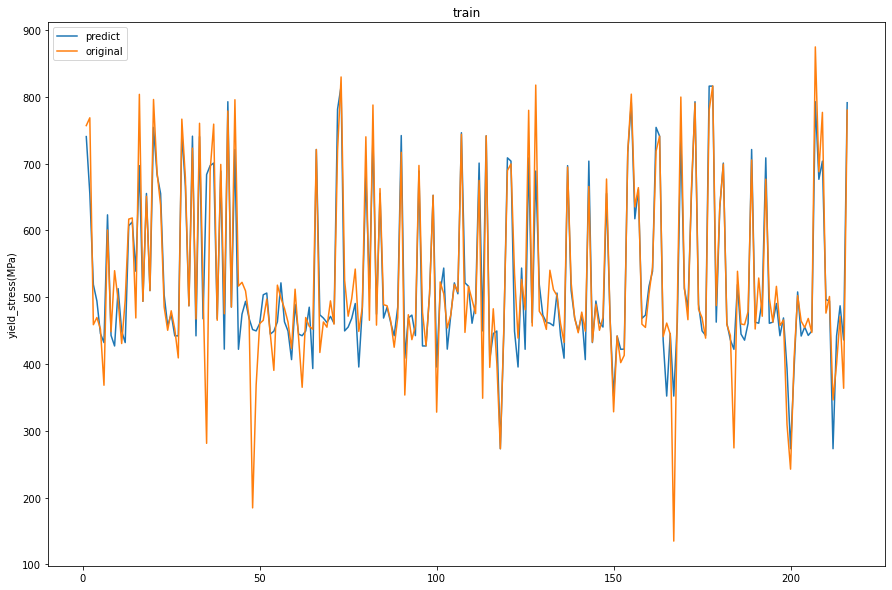

train  rmse: 52.736356248515776  mape: 27.516181001830205  r2: 0.8450330538573891
SpearmanrResult(correlation=0.8433581514998385, pvalue=1.2155596513251715e-59)


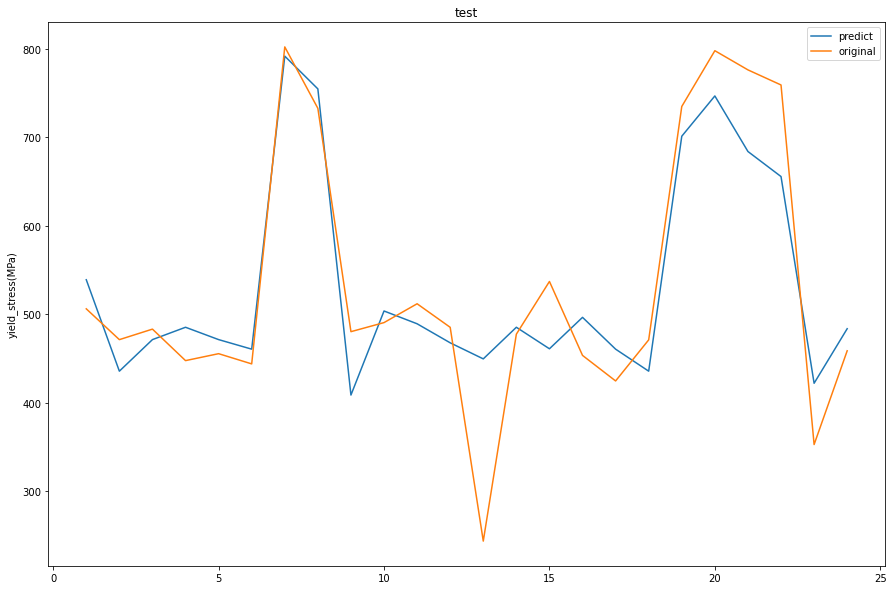

test  rmse: 61.907578662336206  mape: 26.96981050190229  r2: 0.8212541216269473
SpearmanrResult(correlation=0.7371630294035411, pvalue=3.970862414501199e-05)


In [14]:
summarize(model, cond_cols, prop_cols, x, y, X_test, y_test)

In [15]:
joblib.dump(model, './v2_GredientBoosting_yield_stress.pkl')

['./v2_GredientBoosting_yield_stress.pkl']

-----------------------------------------------------------------------------------
tensile_stress

In [16]:
prop_cols = ['tensile_stress(MPa)']
x = df_train[cond_cols].values
y = df_train[prop_cols].values
X_test = df_test[cond_cols].values
y_test = df_test[prop_cols].values

reg = GradientBoostingRegressor(
            criterion='squared_error', ## 개별 트리의 불순도 측도
            random_state=1
        )
param_grid = [{'n_estimators': range(5, 20, 2), 'min_samples_leaf': range(1, 10, 3), 'max_depth': range(3, 11), 
               'learning_rate':[1,0.1,0.01,0.001,0.05], 'subsample':[0.5,0.6,0.7,0.8],
              'loss':['squared_error', 'absolute_error', 'huber', 'quantile']}]
gs = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
gs.fit(x, y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=1),
             n_jobs=-1,
             param_grid=[{'learning_rate': [1, 0.1, 0.01, 0.001, 0.05],
                          'loss': ['squared_error', 'absolute_error', 'huber',
                                   'quantile'],
                          'max_depth': range(3, 11),
                          'min_samples_leaf': range(1, 10, 3),
                          'n_estimators': range(5, 20, 2),
                          'subsample': [0.5, 0.6, 0.7, 0.8]}],
             scoring='r2')

In [17]:
# 그리드서치 학습 결과 출력
print('Best Params: {0}'.format(gs.best_params_))
print('Best Params R2 Score: {0:.3f}'.format(gs.best_score_))

# 최적화 모델 추출
model = gs.best_estimator_

# 테스트세트 R^2 점수 출력
r2_score = model.score(X_test, y_test)
print('Test data R2 Score: {0:.2f}'.format(r2_score))

# 테스트세트 예측 결과 샘플 출력
predicted_y = model.predict(X_test)
for i in range(len(y_test)):
    print('실제 값: {0}, 예측 값: {1:.3f}'.format(y_test[i], predicted_y[i]))

Best Params: {'learning_rate': 1, 'loss': 'huber', 'max_depth': 4, 'min_samples_leaf': 7, 'n_estimators': 17, 'subsample': 0.8}
Best Params R2 Score: 0.840
Test data R2 Score: 0.86
실제 값: [664.38], 예측 값: 641.551
실제 값: [658.91], 예측 값: 657.661
실제 값: [658.94], 예측 값: 632.632
실제 값: [633.87], 예측 값: 685.872
실제 값: [622.69], 예측 값: 632.632
실제 값: [578.26], 예측 값: 538.397
실제 값: [1000.15], 예측 값: 994.282
실제 값: [963.3], 예측 값: 967.297
실제 값: [584.39], 예측 값: 449.779
실제 값: [660.99], 예측 값: 646.369
실제 값: [661.06], 예측 값: 642.530
실제 값: [613.33], 예측 값: 654.532
실제 값: [323.84], 예측 값: 539.381
실제 값: [645.22], 예측 값: 685.872
실제 값: [639.39], 예측 값: 563.589
실제 값: [639.41], 예측 값: 647.654
실제 값: [555.06], 예측 값: 538.397
실제 값: [658.91], 예측 값: 657.661
실제 값: [970.96], 예측 값: 934.158
실제 값: [1007.], 예측 값: 981.406
실제 값: [915.37], 예측 값: 787.740
실제 값: [993.88], 예측 값: 920.755
실제 값: [454.68], 예측 값: 505.438
실제 값: [639.12], 예측 값: 674.104


Paras :  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'init': None, 'learning_rate': 1, 'loss': 'huber', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 17, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


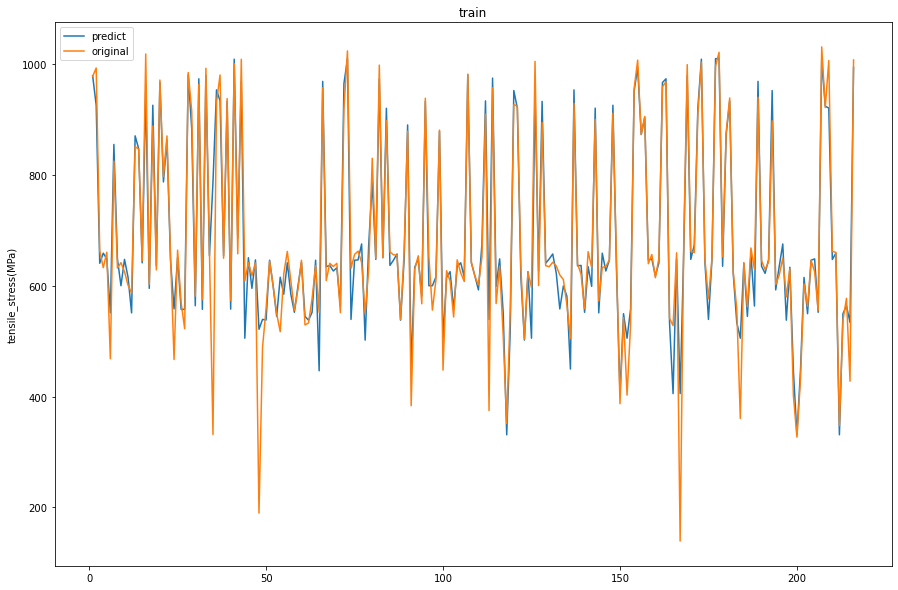

train  rmse: 54.92774842026992  mape: 30.452004461037895  r2: 0.9042298294740247
SpearmanrResult(correlation=0.9331090371082957, pvalue=5.125565661756881e-97)


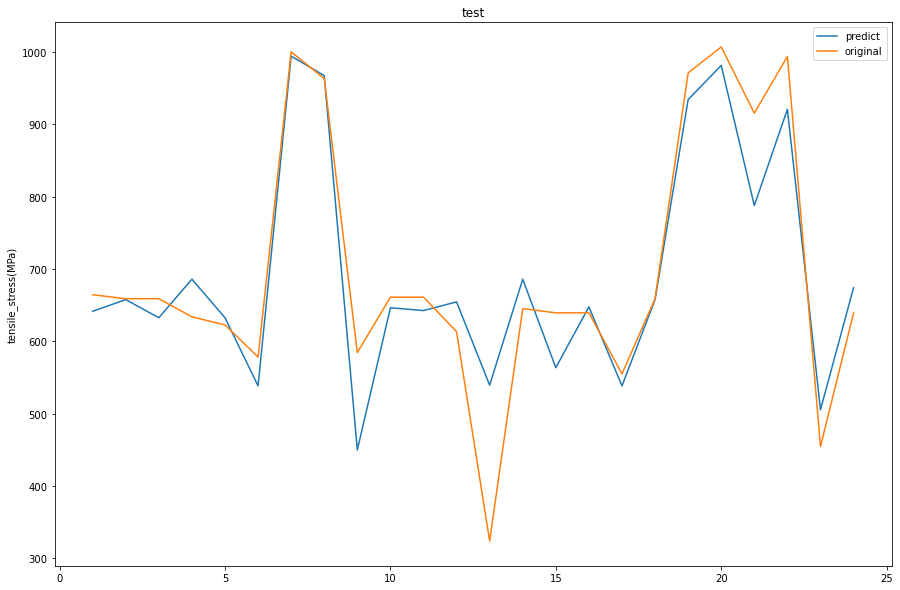

test  rmse: 66.98332600872703  mape: 26.833069576004693  r2: 0.8567778125619142
SpearmanrResult(correlation=0.7860719847269437, pvalue=5.291380526417838e-06)


In [18]:
summarize(model, cond_cols, prop_cols, x, y, X_test, y_test)

In [19]:
joblib.dump(model, './v2_GredientBoosting_tensile_stress.pkl')

['./v2_GredientBoosting_tensile_stress.pkl']

-----------------------------------------------------------------------------------
elongation

In [21]:
prop_cols = ['elongation(%)']
x = df_train[cond_cols].values
y = df_train[prop_cols].values
X_test = df_test[cond_cols].values
y_test = df_test[prop_cols].values

reg = GradientBoostingRegressor(
            criterion='squared_error', ## 개별 트리의 불순도 측도
            random_state=1
        )
param_grid = [{'n_estimators': range(5, 20, 2), 'min_samples_leaf': range(1, 10, 3), 'max_depth': range(3, 11), 
               'learning_rate':[1,0.1,0.01,0.001,0.05], 'subsample':[0.5,0.6,0.7,0.8],
              'loss':['squared_error', 'absolute_error', 'huber', 'quantile']}]
gs = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
gs.fit(x, y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=1),
             n_jobs=-1,
             param_grid=[{'learning_rate': [1, 0.1, 0.01, 0.001, 0.05],
                          'loss': ['squared_error', 'absolute_error', 'huber',
                                   'quantile'],
                          'max_depth': range(3, 11),
                          'min_samples_leaf': range(1, 10, 3),
                          'n_estimators': range(5, 20, 2),
                          'subsample': [0.5, 0.6, 0.7, 0.8]}],
             scoring='r2')

In [22]:
# 그리드서치 학습 결과 출력
print('Best Params: {0}'.format(gs.best_params_))
print('Best Params R2 Score: {0:.3f}'.format(gs.best_score_))

# 최적화 모델 추출
model = gs.best_estimator_

# 테스트세트 R^2 점수 출력
r2_score = model.score(X_test, y_test)
print('Test data R2 Score: {0:.2f}'.format(r2_score))

# 테스트세트 예측 결과 샘플 출력
predicted_y = model.predict(X_test)
for i in range(len(y_test)):
    print('실제 값: {0}, 예측 값: {1:.3f}'.format(y_test[i], predicted_y[i]))

Best Params: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 19, 'subsample': 0.5}
Best Params R2 Score: 0.318
Test data R2 Score: 0.47
실제 값: [40.4], 예측 값: 36.090
실제 값: [38.5], 예측 값: 37.128
실제 값: [44.2], 예측 값: 36.503
실제 값: [38.5], 예측 값: 35.564
실제 값: [19.2], 예측 값: 36.503
실제 값: [45.8], 예측 값: 41.312
실제 값: [18.7], 예측 값: 21.285
실제 값: [22.], 예측 값: 21.136
실제 값: [50.8], 예측 값: 21.400
실제 값: [38.5], 예측 값: 37.250
실제 값: [40.4], 예측 값: 34.971
실제 값: [36.5], 예측 값: 37.872
실제 값: [1.2], 예측 값: 23.057
실제 값: [38.5], 예측 값: 35.564
실제 값: [37.3], 예측 값: 27.094
실제 값: [38.5], 예측 값: 36.659
실제 값: [47.3], 예측 값: 41.312
실제 값: [38.5], 예측 값: 37.128
실제 값: [23.7], 예측 값: 25.195
실제 값: [20.], 예측 값: 22.008
실제 값: [12.3], 예측 값: 15.106
실제 값: [23.7], 예측 값: 24.889
실제 값: [3.8], 예측 값: 20.870
실제 값: [44.2], 예측 값: 36.445


Paras :  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 0.5, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


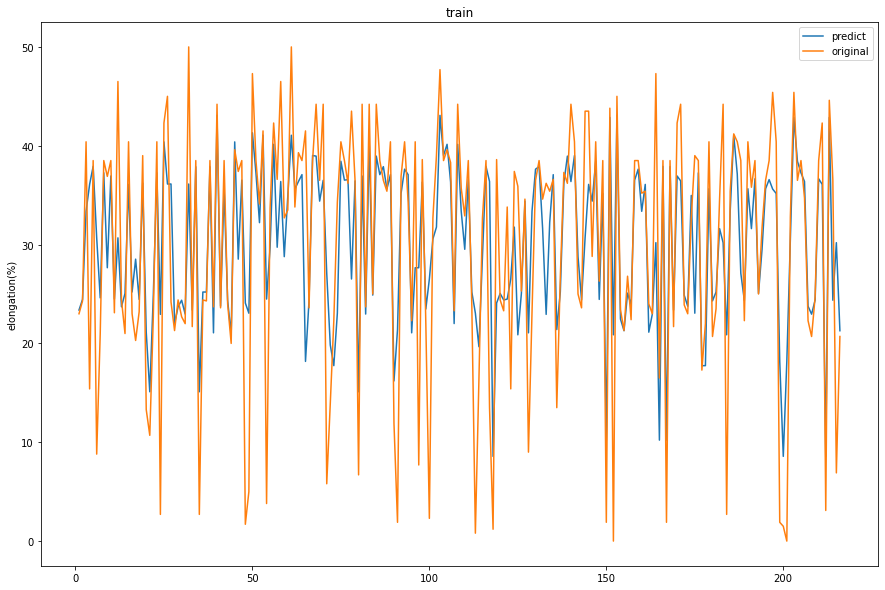

C:\Users\RJH\AppData\Local\Temp\ipykernel_13436\2639364781.py:19: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true-y_pred)/y_true))*100


train  rmse: 8.031389299639507  mape: inf  r2: 0.5938342018557525
SpearmanrResult(correlation=0.7857324430320541, pvalue=1.571824612977223e-46)


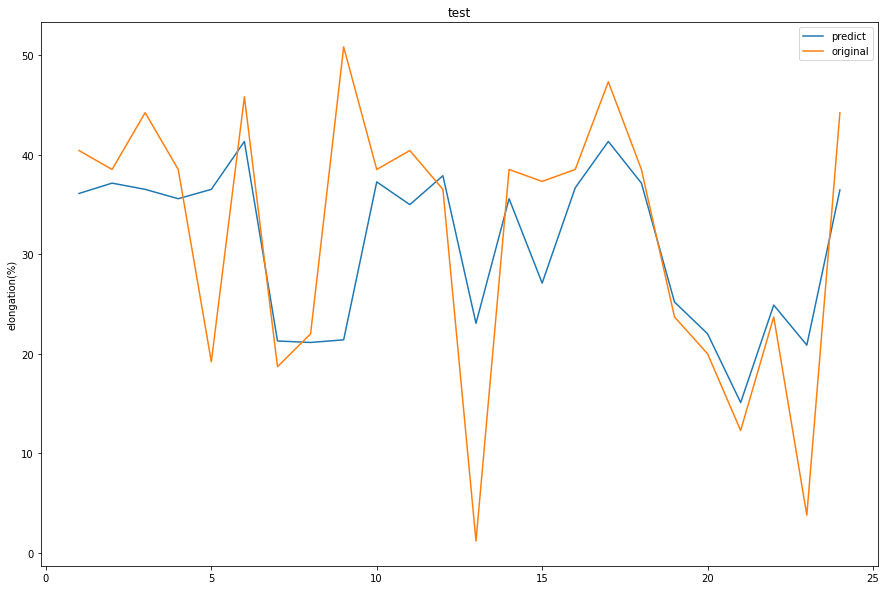

test  rmse: 9.81344680094011  mape: 167.76040397721334  r2: 0.47132209279875437
SpearmanrResult(correlation=0.5908457494941591, pvalue=0.002365020184765622)


In [23]:
summarize(model, cond_cols, prop_cols, x, y, X_test, y_test)

In [24]:
joblib.dump(model, './v2_GredientBoosting_elongation.pkl')

['./v2_GredientBoosting_elongation.pkl']

-----------------------------------------------------------------------------------
density

In [25]:
prop_cols = ['density(g/cm^3)']
x = df_train[cond_cols].values
y = df_train[prop_cols].values
X_test = df_test[cond_cols].values
y_test = df_test[prop_cols].values

reg = GradientBoostingRegressor(
            criterion='squared_error', ## 개별 트리의 불순도 측도
            random_state=1
        )
param_grid = [{'n_estimators': range(5, 20, 2), 'min_samples_leaf': range(1, 10, 3), 'max_depth': range(3, 11), 
               'learning_rate':[1,0.1,0.01,0.001,0.05], 'subsample':[0.5,0.6,0.7,0.8],
              'loss':['squared_error', 'absolute_error', 'huber', 'quantile']}]
gs = GridSearchCV(estimator=reg, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
gs.fit(x, y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=1),
             n_jobs=-1,
             param_grid=[{'learning_rate': [1, 0.1, 0.01, 0.001, 0.05],
                          'loss': ['squared_error', 'absolute_error', 'huber',
                                   'quantile'],
                          'max_depth': range(3, 11),
                          'min_samples_leaf': range(1, 10, 3),
                          'n_estimators': range(5, 20, 2),
                          'subsample': [0.5, 0.6, 0.7, 0.8]}],
             scoring='r2')

In [26]:
# 그리드서치 학습 결과 출력
print('Best Params: {0}'.format(gs.best_params_))
print('Best Params R2 Score: {0:.3f}'.format(gs.best_score_))

# 최적화 모델 추출
model = gs.best_estimator_

# 테스트세트 R^2 점수 출력
r2_score = model.score(X_test, y_test)
print('Test data R2 Score: {0:.2f}'.format(r2_score))

# 테스트세트 예측 결과 샘플 출력
predicted_y = model.predict(X_test)
for i in range(len(y_test)):
    print('실제 값: {0}, 예측 값: {1:.3f}'.format(y_test[i], predicted_y[i]))

Best Params: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 19, 'subsample': 0.7}
Best Params R2 Score: 0.786
Test data R2 Score: 0.85
실제 값: [7.85], 예측 값: 7.841
실제 값: [7.88], 예측 값: 7.839
실제 값: [7.75], 예측 값: 7.836
실제 값: [7.8], 예측 값: 7.841
실제 값: [7.93], 예측 값: 7.836
실제 값: [7.75], 예측 값: 7.871
실제 값: [8.15], 예측 값: 8.097
실제 값: [8.16], 예측 값: 8.090
실제 값: [7.91], 예측 값: 7.869
실제 값: [7.85], 예측 값: 7.837
실제 값: [7.86], 예측 값: 7.840
실제 값: [7.81], 예측 값: 7.846
실제 값: [7.81], 예측 값: 7.867
실제 값: [7.86], 예측 값: 7.841
실제 값: [7.9], 예측 값: 7.843
실제 값: [7.8], 예측 값: 7.826
실제 값: [7.86], 예측 값: 7.871
실제 값: [7.82], 예측 값: 7.839
실제 값: [8.11], 예측 값: 8.101
실제 값: [8.18], 예측 값: 8.097
실제 값: [8.03], 예측 값: 8.011
실제 값: [8.12], 예측 값: 8.081
실제 값: [7.82], 예측 값: 7.859
실제 값: [7.82], 예측 값: 7.846


Paras :  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 19, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 0.7, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


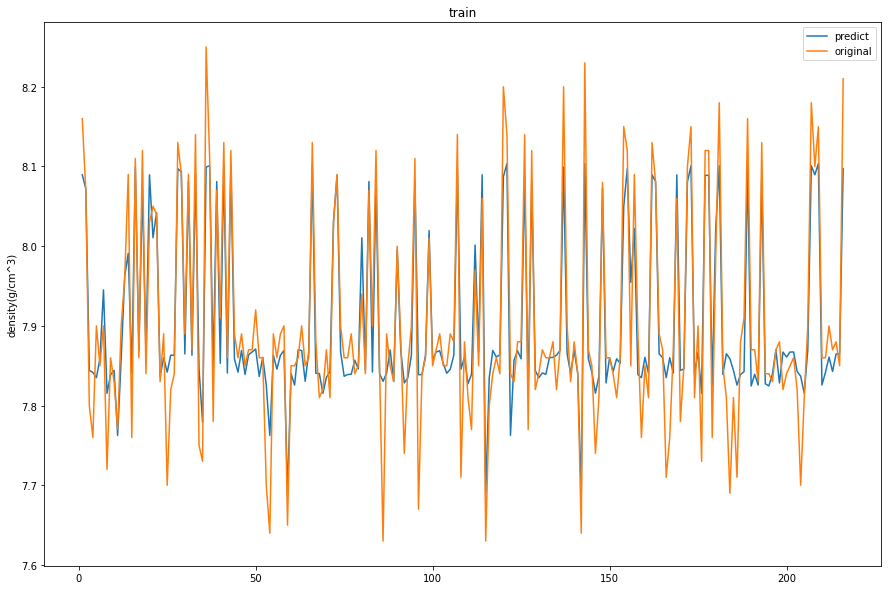

train  rmse: 0.05218186745698045  mape: 1.5924443126620522  r2: 0.8479311515053944
SpearmanrResult(correlation=0.7963348750095843, pvalue=1.2808623074085626e-48)


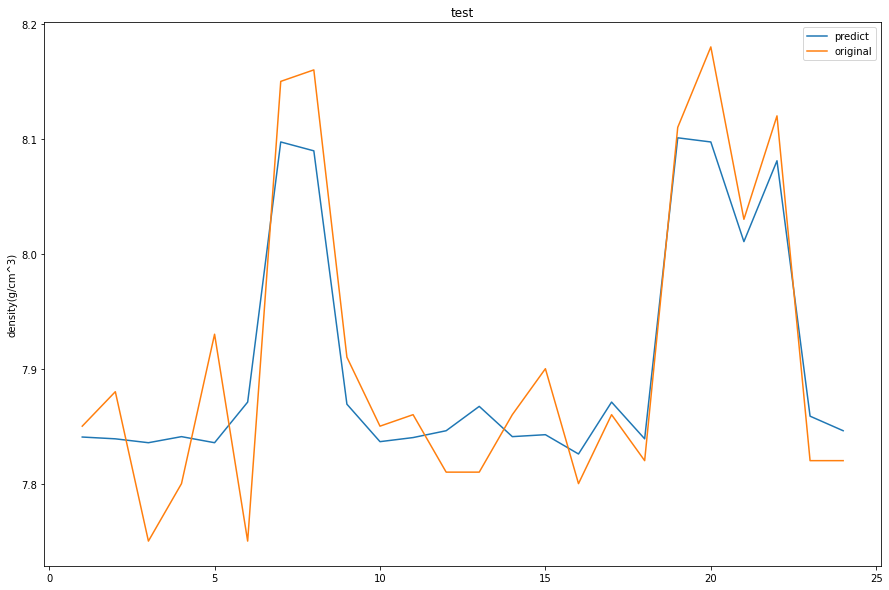

test  rmse: 0.05191469302243133  mape: 1.5684425561782023  r2: 0.8486218600960252
SpearmanrResult(correlation=0.5643828496576402, pvalue=0.004067153274880515)


In [27]:
summarize(model, cond_cols, prop_cols, x, y, X_test, y_test)

In [28]:
joblib.dump(model, './v2_GredientBoosting_density.pkl')

['./v2_GredientBoosting_density.pkl']